A grocery store shared the transactional data with you. Your job is to conduct a thorough analysis of Point of Sale (POS) data, identify the most commonly occurring sets of items in the customer orders, and provide recommendations through which a grocery store can increase its revenue by popular combo offers & discounts for customers.

In [1]:
##
## importiing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
##
##

from google.colab import files
uploaded = files.upload()

Saving dataset_group.csv to dataset_group.csv


##PART B: Exploratory Analysis

--> Exploratory Analysis of data & an executive summary (in PPT) of your top findings, supported by graphs.

--> Are there trends across months/years/quarters/days etc. that you are able to notice?


Summary from analysis
- dtypes: int64(1), object(2)
- 20% of the data is duplicates
- There are no null values within the features, all the columns have data and there are a total of 20641 instances per feature
- There are a total of 3 features(columns)
- There are multiple products from from meat to veggies and some more, all kitchen and home related stuff.
- The quantity of each product occuring is very close, the vairation would be almost + or - 75 counts.
- we have only 603 unique date values, meaning the count is less than the range that we have.



In [3]:
##
##

group1 = pd.read_csv('dataset_group.csv')
group1.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
##
##

group1.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
##
##

group1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
##
##

group1.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,20641,603,08-02-2019,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641.0,NaN,NaN,NaN,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0
Product,20641,37,poultry,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
##
##

group1.shape

(20641, 3)

In [8]:
##
##

group1.duplicated().sum()

4730

In [9]:
##
##

group1.columns

Index(['Date', 'Order_id', 'Product'], dtype='object')

In [10]:
##
##

group1['Order_id'].value_counts()

226     34
957     34
1013    34
1071    34
10      33
        ..
243      4
1114     4
523      4
408      3
1139     3
Name: Order_id, Length: 1139, dtype: int64

In [11]:
##
##

group1['Product'].value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

In [12]:
##
##

group1['Product'].nunique()

37

In [13]:
##
##

group1['Date'].value_counts()

08-02-2019    183
20-02-2019    146
06-03-2018    134
01-03-2018    127
17-05-2018    123
             ... 
03-09-2019      5
05-09-2019      4
24-09-2018      4
11-03-2019      4
26-02-2020      3
Name: Date, Length: 603, dtype: int64

In [14]:
##
## change column date into a datetime datatype

group1['Date'] = pd.to_datetime(group1['Date'])


<ipython-input-14-506607adb9a6>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  group1['Date'] = pd.to_datetime(group1['Date'])


In [15]:
##
##

group1.describe(include = 'all').T

<ipython-input-15-49e6cca7e080>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  group1.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,20641,603,2019-08-02 00:00:00,183,2018-01-01,2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641.0,NaN,NaN,NaN,NaT,NaT,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0
Product,20641,37,poultry,640,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
##
## maximum date value

group1['Date'].max()


Timestamp('2020-12-02 00:00:00')

In [17]:
##
## minimum date value

group1['Date'].min()


Timestamp('2018-01-01 00:00:00')

In [18]:
##
## count of unique date values

group1['Date'].nunique()



603

In [19]:
##
## flipping the dataframe in a different format

group2 = group1.groupby(['Date', 'Order_id'])['Product'].apply(lambda x: ','.join(x.astype(str))).reset_index()
group2.head()


,Date,Order_id,Product
0,2018-01-01,1,"yogurt,pork,sandwich bags,lunch meat,all- purp..."
1,2018-01-01,2,"toilet paper,shampoo,hand soap,waffles,cheeses..."
2,2018-01-02,63,"juice,yogurt,ice cream,ice cream,toilet paper,..."
3,2018-01-03,118,"beef,bagels,cheeses,soda,poultry,cheeses,flour..."
4,2018-01-03,119,"mixes,cheeses,yogurt,coffee/tea,coffee/tea,bee..."


In [20]:
##
##

group2.describe(include = 'all').T

<ipython-input-20-287b90c80ee8>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  group2.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,1139,603,2019-08-02 00:00:00,8,2018-01-01,2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,1139.0,NaN,NaN,NaN,NaT,NaT,570.0,328.945284,1.0,285.5,570.0,854.5,1139.0
Product,1139,1139,"yogurt,pork,sandwich bags,lunch meat,all- purp...",1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
##
##

group2.sort_values(['Order_id']).tail()

,Date,Order_id,Product
1101,2020-02-22,1135,"sugar,beef,sandwich bags,hand soap,paper towel..."
1102,2020-02-23,1136,"coffee/tea,dinner rolls,lunch meat,spaghetti s..."
1103,2020-02-24,1137,"beef,lunch meat,eggs,poultry,tortillas,beef,be..."
1104,2020-02-25,1138,"sandwich bags,ketchup,milk,poultry,cheeses,soa..."
1105,2020-02-26,1139,"soda,laundry detergent,shampoo"


In [22]:
###
##

group2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1139 non-null   datetime64[ns]
 1   Order_id  1139 non-null   int64         
 2   Product   1139 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 26.8+ KB


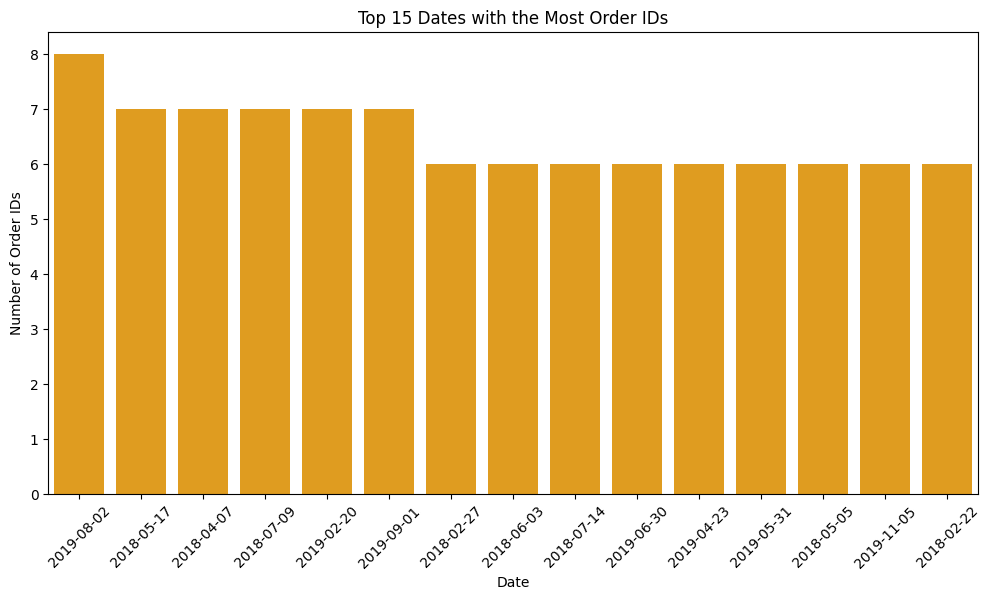

In [23]:
##
## Get the top 15 dates with the most order ids
top_15_dates = group2['Date'].value_counts().head(15)

## Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_dates.index, y=top_15_dates.values, color = 'orange')

## Set the title and labels
plt.title('Top 15 Dates with the Most Order IDs')
plt.xlabel('Date')
plt.ylabel('Number of Order IDs')
plt.xticks(rotation=45)
plt.show()


In [24]:
##
##

zero_order_dates = group2[group2['Order_id'].isnull()]['Date'].unique()

print(zero_order_dates)

[]


<ipython-input-25-2eabd29afd18>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = bottom_15_dates.index, y = bottom_15_dates.values, palette='Set2')


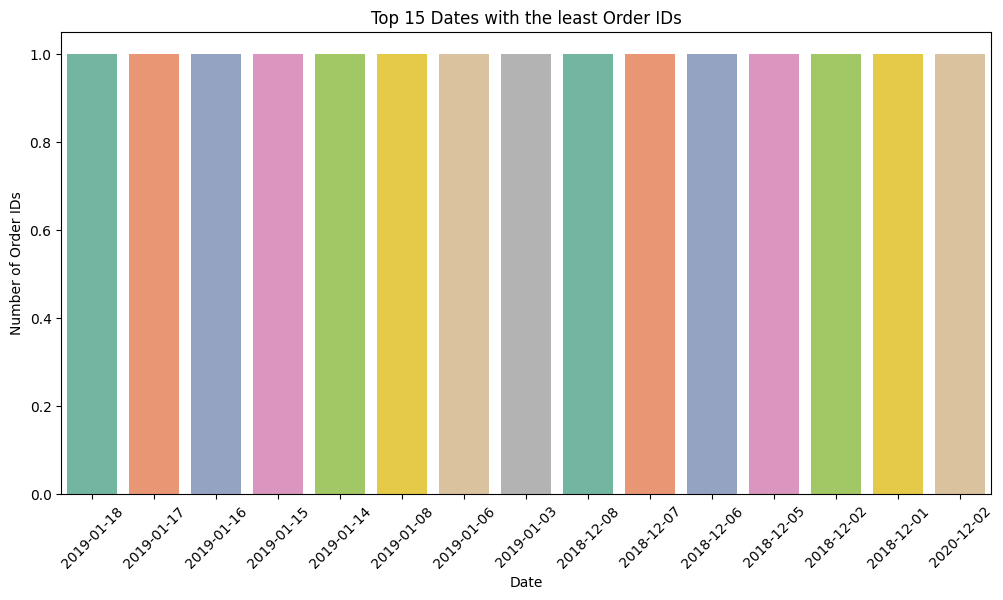

In [25]:
##
## Get the top 15 dates with the most order ids
bottom_15_dates = group2['Date'].value_counts().tail(15)

## Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x = bottom_15_dates.index, y = bottom_15_dates.values, palette='Set2')

## Set the title and labels
plt.title('Top 15 Dates with the least Order IDs')
plt.xlabel('Date')
plt.ylabel('Number of Order IDs')
plt.xticks(rotation=45)
plt.show()


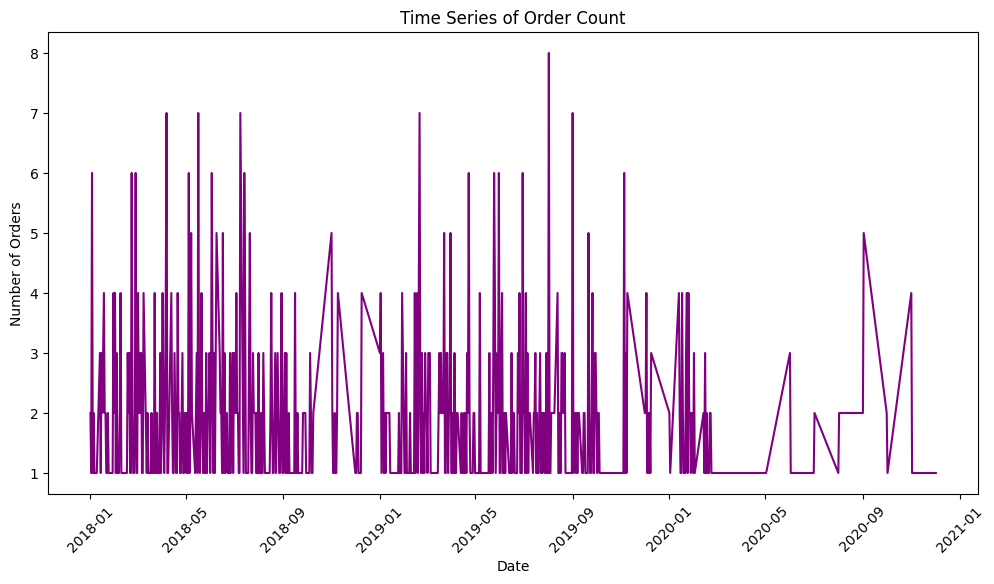

In [26]:
##
## Create a time series of the order count
order_count_ts = group2.groupby('Date')['Order_id'].count()

## Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_count_ts, color = 'purple')

## Set the title and labels
plt.title('Time Series of Order Count')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


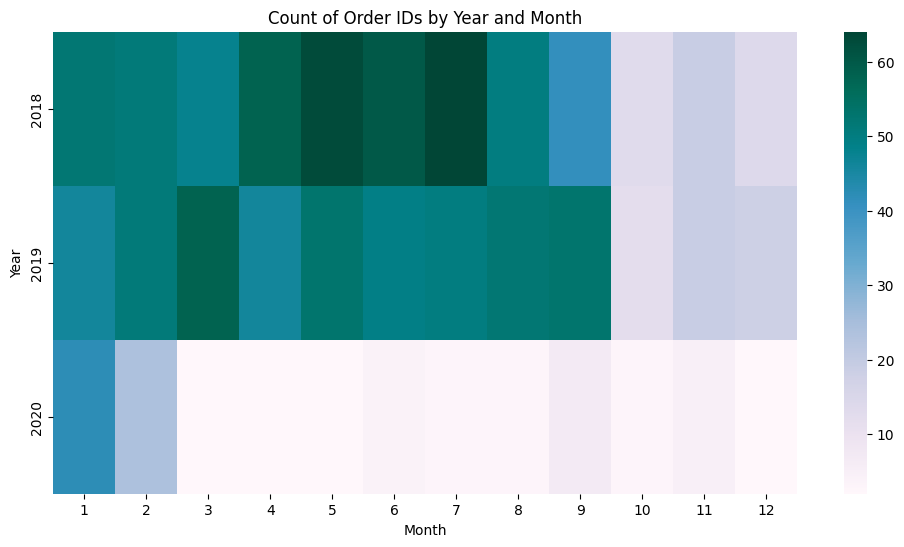

In [27]:
##
## Create a new column for the year
group2['Year'] = group2['Date'].dt.year

## Create a new column for the month
group2['Month'] = group2['Date'].dt.month

## Create a pivot table to count the number of orders for each year and month
order_count_pivot = pd.pivot_table(data=group2, index='Year', columns='Month', values='Order_id', aggfunc='count')

## Plot the pivot table as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(order_count_pivot, cmap='PuBuGn')

## Set the title and labels
plt.title('Count of Order IDs by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


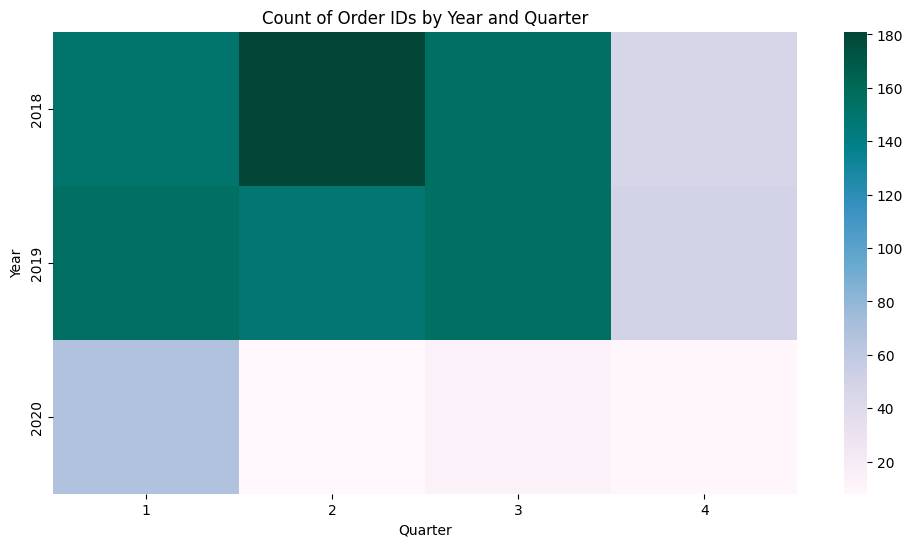

In [28]:
##
## Create a new column for the quarter
group2['Quarter'] = group2['Date'].dt.quarter

## Create a new column for the year
group2['Year'] = group2['Date'].dt.year

## Create a pivot table to count the number of orders for each year and quarter
order_count_pivot = pd.pivot_table(data=group2, index='Year', columns='Quarter', values='Order_id', aggfunc='count')

## Plot the pivot table as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(order_count_pivot, cmap='PuBuGn')

## Set the title and labels
plt.title('Count of Order IDs by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.show()


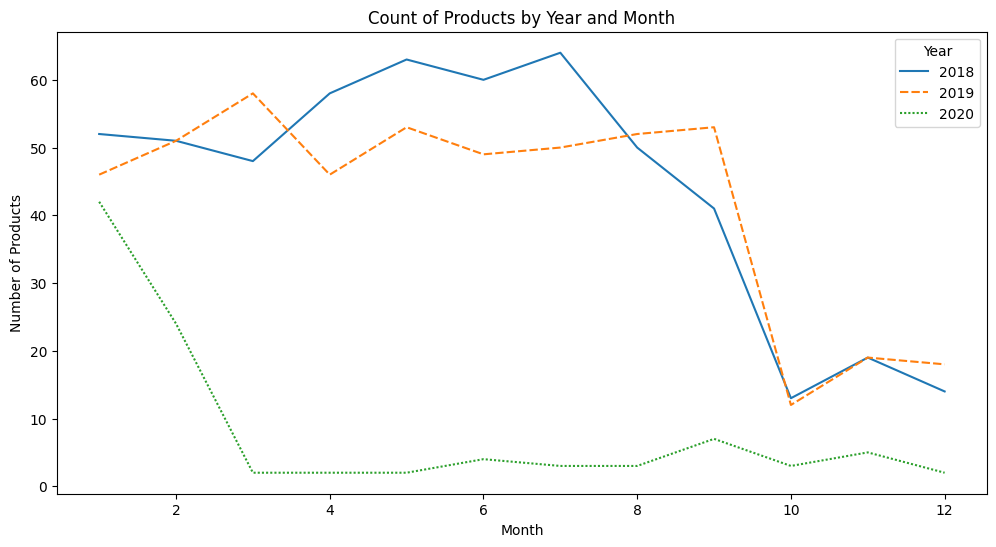

In [29]:
##
## Create a new column for the day
group2['Day'] = group2['Date'].dt.day

## Create a new column for the month
group2['Month'] = group2['Date'].dt.month

## Create a new column for the year
group2['Year'] = group2['Date'].dt.year

## Create a new pivot table to count the number of products for each year and month
product_count_pivot_year = pd.pivot_table(data=group2, index='Month', columns='Year', values='Product', aggfunc='count')

## Plot the pivot table as a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_count_pivot_year)

## Set the title and labels
plt.title('Count of Products by Year and Month')
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.show()


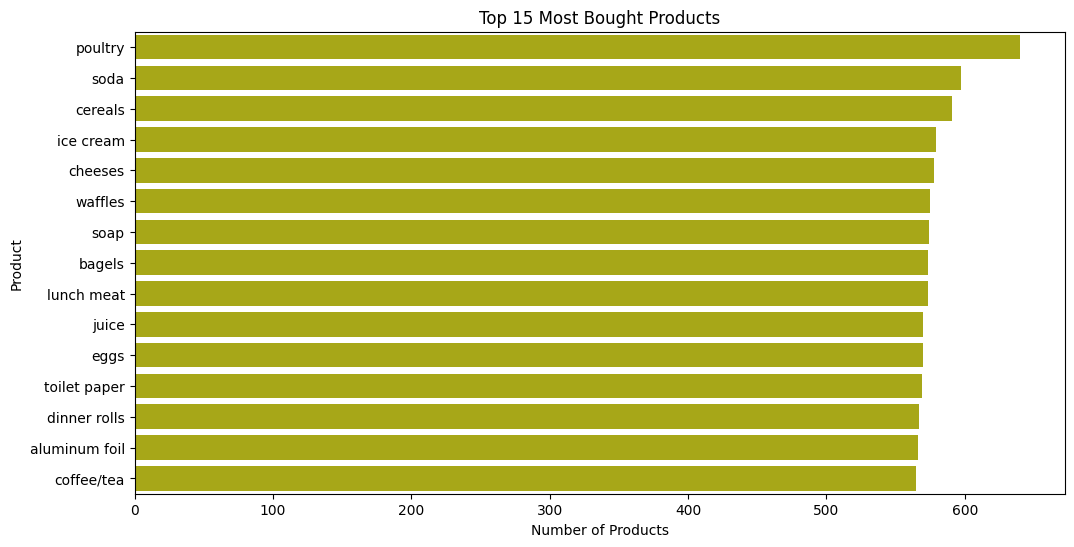

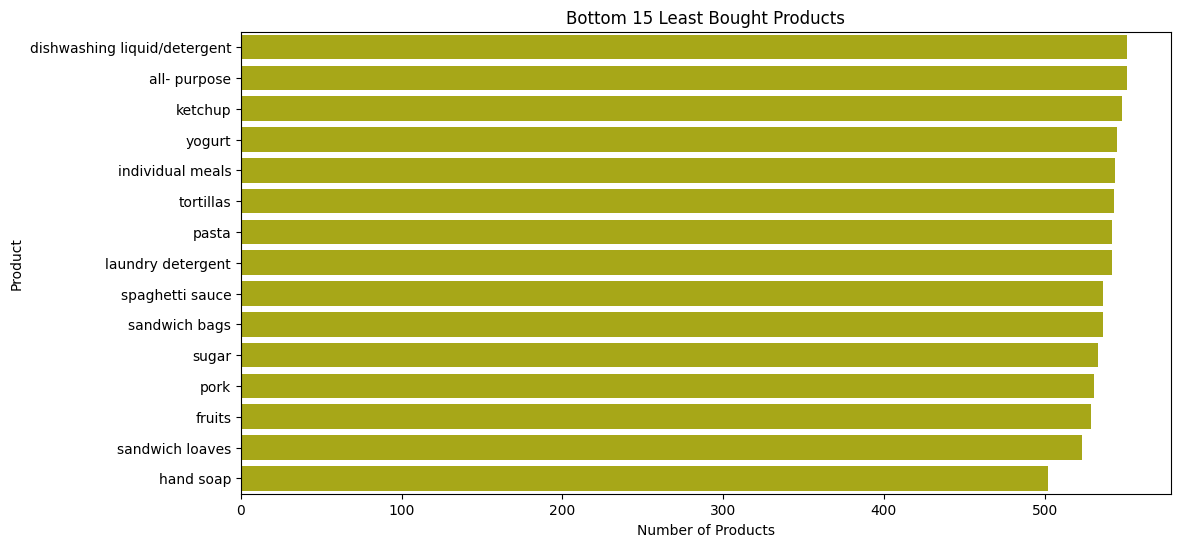

In [30]:
##
## Get the top 15 most bought products
top_15_products = group1['Product'].value_counts().head(15)

## Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_products.values, y=top_15_products.index, color = 'y')

## Set the title and labels
plt.title('Top 15 Most Bought Products')
plt.xlabel('Number of Products')
plt.ylabel('Product')
plt.show()

## Get the bottom 15 least bought products
bottom_15_products = group1['Product'].value_counts().tail(15)

## Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_15_products.values, y=bottom_15_products.index, color = 'y')

## Set the title and labels
plt.title('Bottom 15 Least Bought Products')
plt.xlabel('Number of Products')
plt.ylabel('Product')
plt.show()


In [31]:
##
## Get the maximum and minimum dates
max_date = group2['Date'].max()
min_date = group2['Date'].min()

## Create a sequence of all dates between the maximum and minimum dates
date_range = pd.date_range(start=min_date, end=max_date)

## Check if all the dates in the DataFrame are present in the date range
all_dates_present = set(group2['Date']).issubset(set(date_range))
print(all_dates_present)


True


In [32]:
##
##

import datetime

max_date = group1['Date'].max()
min_date = group1['Date'].min()

date_diff = max_date - min_date

print(date_diff.days)


1066


In [33]:
##
##

duplicate_dates = group2[group2.duplicated(subset='Date', keep=False)]
print(duplicate_dates)

## we do not have all the values of any month.

           Date  Order_id                                            Product  \
0    2018-01-01         1  yogurt,pork,sandwich bags,lunch meat,all- purp...   
1    2018-01-01         2  toilet paper,shampoo,hand soap,waffles,cheeses...   
3    2018-01-03       118  beef,bagels,cheeses,soda,poultry,cheeses,flour...   
4    2018-01-03       119  mixes,cheeses,yogurt,coffee/tea,coffee/tea,bee...   
5    2018-01-03       120  bagels,paper towels,sugar,sandwich loaves,spag...   
...         ...       ...                                                ...   
1130 2020-10-01      1057     pasta,dinner rolls,poultry,aluminum foil,juice   
1132 2020-11-01      1058  cheeses,flour,soda,ice cream,lunch meat,juice,...   
1133 2020-11-01      1059  dishwashing liquid/detergent,eggs,juice,dinner...   
1134 2020-11-01      1060  paper towels,shampoo,soda,eggs,paper towels,fl...   
1135 2020-11-01      1061  shampoo,eggs,beef,ketchup,pork,dinner rolls,ba...   

      Year  Month  Quarter  Day  
0    

In [34]:
##
##

jan_feb_mar_2018 = group2[(group2['Date'].dt.year == 2019) & (group2['Date'].dt.month.isin([11, 12]))]
jan_feb_mar_2018.head(100)


,Date,Order_id,Product,Year,Month,Quarter,Day
1003,2019-11-01,555,"ketchup,cheeses,hand soap,flour,sandwich bags,...",2019,11,4,1
1004,2019-11-02,606,"sandwich loaves,lunch meat,cereals,flour,yogur...",2019,11,4,2
1005,2019-11-03,667,"toilet paper,juice,beef,eggs",2019,11,4,3
1006,2019-11-04,735,"sandwich bags,individual meals,toilet paper,al...",2019,11,4,4
1007,2019-11-05,786,"milk,tortillas,milk,spaghetti sauce,beef,poult...",2019,11,4,5
1008,2019-11-05,787,"cereals,bagels,toilet paper,mixes,spaghetti sa...",2019,11,4,5
1009,2019-11-05,788,"sugar,yogurt,milk,eggs,dishwashing liquid/dete...",2019,11,4,5
1010,2019-11-05,789,"tortillas,laundry detergent,pasta,pork,yogurt,...",2019,11,4,5
1011,2019-11-05,790,"butter,lunch meat,sandwich bags,waffles,soap,f...",2019,11,4,5
1012,2019-11-05,791,"soda,fruits,yogurt,cereals,toilet paper,dishwa...",2019,11,4,5


In [35]:
##
##

group2.head()

,Date,Order_id,Product,Year,Month,Quarter,Day
0,2018-01-01,1,"yogurt,pork,sandwich bags,lunch meat,all- purp...",2018,1,1,1
1,2018-01-01,2,"toilet paper,shampoo,hand soap,waffles,cheeses...",2018,1,1,1
2,2018-01-02,63,"juice,yogurt,ice cream,ice cream,toilet paper,...",2018,1,1,2
3,2018-01-03,118,"beef,bagels,cheeses,soda,poultry,cheeses,flour...",2018,1,1,3
4,2018-01-03,119,"mixes,cheeses,yogurt,coffee/tea,coffee/tea,bee...",2018,1,1,3


In [36]:
##
##


group3 = group2[['Date', 'Order_id', 'Product']]
group3.head()

,Date,Order_id,Product
0,2018-01-01,1,"yogurt,pork,sandwich bags,lunch meat,all- purp..."
1,2018-01-01,2,"toilet paper,shampoo,hand soap,waffles,cheeses..."
2,2018-01-02,63,"juice,yogurt,ice cream,ice cream,toilet paper,..."
3,2018-01-03,118,"beef,bagels,cheeses,soda,poultry,cheeses,flour..."
4,2018-01-03,119,"mixes,cheeses,yogurt,coffee/tea,coffee/tea,bee..."


In [37]:
##
##


#group3.to_csv('group3.csv')
#files.download('group3.csv')


In [38]:
##
##


group1['Product_encoded'] = group1['Product'].astype('category').cat.codes + 800
group1.head()


,Date,Order_id,Product,Product_encoded
0,2018-01-01,1,yogurt,836
1,2018-01-01,1,pork,824
2,2018-01-01,1,sandwich bags,826
3,2018-01-01,1,lunch meat,819
4,2018-01-01,1,all- purpose,800


In [39]:
##
## unique with their product_encoded values

group1[['Product', 'Product_encoded']].drop_duplicates()


,Product,Product_encoded
0,yogurt,836
1,pork,824
2,sandwich bags,826
3,lunch meat,819
4,all- purpose,800
5,flour,811
6,soda,830
7,butter,804
8,beef,803
9,aluminum foil,801


In [40]:
##
## flipping the dataframe in a different format

group4 = group1.groupby(['Date', 'Order_id'])['Product_encoded'].apply(lambda x: ','.join(x.astype(str))).reset_index()
group4.head()


,Date,Order_id,Product_encoded
0,2018-01-01,1,"836,824,826,819,800,811,830,804,803,801,800,80..."
1,2018-01-01,2,"833,828,813,835,806,821,820,826,818,809,835,81..."
2,2018-01-02,63,"816,836,814,814,833,814,807,826,830,817,801,80..."
3,2018-01-03,118,"803,802,806,830,825,806,811,808,813,818,811,82..."
4,2018-01-03,119,"821,806,836,807,807,803,833,828,827,817,827,82..."


In [41]:
##
##


##group4.to_csv('group4.csv')
##files.download('group4.csv')

